# Desafío 3

## Modelado para Mushrooms

---
<b><a id='section_1_'>1.1. Descripción del dataset Hongos</a></b>

In [93]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import math

In [94]:
data_location = "../Data/Hongos/mushrooms.csv"
data = pd.read_csv(data_location, sep=",")
print(data.shape)


(8124, 23)


In [95]:
data_describe = pd.DataFrame(round(data.isnull().sum() /data.shape[0],2), columns= ['Porcentaje de nulos'])
data_describe['type'] = data.dtypes
data_describe = data_describe[['type','Porcentaje de nulos']]
data_describe['Nulos'] = data.isnull().sum()
values= []
example=[]
for x in data:
    values.append(len(data[x].unique()))
    example.append(data[x].unique())
data_describe['Valores distintos'] = values
data_describe['Ejemplos'] = example


data_describe

,type,Porcentaje de nulos,Nulos,Valores distintos,Ejemplos
class,object,0.0,0,2,"[p, e]"
cap-shape,object,0.0,0,6,"[x, b, s, f, k, c]"
cap-surface,object,0.0,0,4,"[s, y, f, g]"
cap-color,object,0.0,0,10,"[n, y, w, g, e, p, b, u, c, r]"
bruises,object,0.0,0,2,"[t, f]"
odor,object,0.0,0,9,"[p, a, l, n, f, c, y, s, m]"
gill-attachment,object,0.0,0,2,"[f, a]"
gill-spacing,object,0.0,0,2,"[c, w]"
gill-size,object,0.0,0,2,"[n, b]"
gill-color,object,0.0,0,12,"[k, n, g, p, w, h, u, e, b, r, y, o]"


In [96]:
# Analizamos la proporción entre clases Target
data['class'].value_counts(normalize=True).round(2)

e    0.52
p    0.48
Name: class, dtype: float64

---
<b><a id='section_1_'>1.2. Transformación de variables Categoricas</a></b>

In [97]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder

### LabelEncoder para estudiar correlaciones

In [98]:
le = LabelEncoder()

In [99]:
data_le = data.apply(le.fit_transform)
data_le.head(3)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3


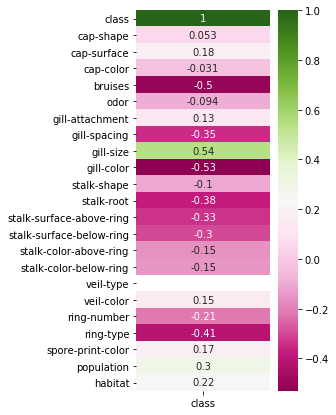

In [100]:
plt.figure(figsize=(3,7))
sns.heatmap(data_le.corr()[['class']], cmap="PiYG", annot=True)

In [101]:
#sns.pairplot(data_le.drop(['veil-type'], axis=1), hue= 'class', diag_kind='none')
#funciona


### Separación de features, target y sets de entrenamiento y testeo

In [102]:
data['class']= data['class'].apply(lambda x: 1 if x is 'p' else 0)
data['class'].value_counts()

0    4208
1    3916
Name: class, dtype: int64

In [103]:
X = data.drop(['class','veil-type'], axis=1)
y = data['class']
print(type(X))
print(type(y))


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [104]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y, random_state=12)

In [105]:
display(y_train.value_counts(normalize=True).round(2))
display(y_test.value_counts(normalize=True).round(2))

0    0.52
1    0.48
Name: class, dtype: float64

0    0.52
1    0.48
Name: class, dtype: float64

In [139]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first')

X_train_encoder = encoder.fit_transform(X_train)
X_test_encoder = encoder.transform(X_test)
encoder.get_feature_names(input_features=X_train.columns)

array(['cap-shape_c', 'cap-shape_f', 'cap-shape_k', 'cap-shape_s',
       'cap-shape_x', 'cap-surface_g', 'cap-surface_s', 'cap-surface_y',
       'cap-color_c', 'cap-color_e', 'cap-color_g', 'cap-color_n',
       'cap-color_p', 'cap-color_r', 'cap-color_u', 'cap-color_w',
       'cap-color_y', 'bruises_t', 'odor_c', 'odor_f', 'odor_l', 'odor_m',
       'odor_n', 'odor_p', 'odor_s', 'odor_y', 'gill-attachment_f',
       'gill-spacing_w', 'gill-size_n', 'gill-color_e', 'gill-color_g',
       'gill-color_h', 'gill-color_k', 'gill-color_n', 'gill-color_o',
       'gill-color_p', 'gill-color_r', 'gill-color_u', 'gill-color_w',
       'gill-color_y', 'stalk-shape_t', 'stalk-root_b', 'stalk-root_c',
       'stalk-root_e', 'stalk-root_r', 'stalk-surface-above-ring_k',
       'stalk-surface-above-ring_s', 'stalk-surface-above-ring_y',
       'stalk-surface-below-ring_k', 'stalk-surface-below-ring_s',
       'stalk-surface-below-ring_y', 'stalk-color-above-ring_c',
       'stalk-color-above-rin

### GridSearchCV con KNN y LogisticRegression

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import normalize

In [108]:
lr = LogisticRegression()
knn = KNeighborsClassifier()

In [109]:
k_range = list(range(1, 30))
C = np.linspace(0.09,0.29,10)
solver = ['saga']
penalty = ['l1','l2']
weight_options = ['uniform', 'distance']
#class_weight = ['balanced']


In [110]:
param_grid_lr = dict(C=C, solver=solver, penalty=penalty)
print(param_grid_lr)

{'C': array([0.09      , 0.11222222, 0.13444444, 0.15666667, 0.17888889,
       0.20111111, 0.22333333, 0.24555556, 0.26777778, 0.29      ]), 'solver': ['saga'], 'penalty': ['l1', 'l2']}


In [111]:
param_grid_knn = dict(n_neighbors=k_range, weights=weight_options)
print(param_grid_knn)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], 'weights': ['uniform', 'distance']}


Evaluamos la mejor configuración de hiperparámetros de cada modelo: **LogReg** y **KNN**

In [112]:
from sklearn.model_selection import StratifiedKFold
folds=StratifiedKFold(n_splits=5, random_state=19, shuffle=True)

In [113]:
grid_lr = GridSearchCV(lr, param_grid_lr, cv=folds, scoring='accuracy')
grid_lr.fit(X_train_encoder, y_train)
grid_knn = GridSearchCV(knn, param_grid_knn, cv=folds, scoring='accuracy')
grid_knn.fit(X_train_encoder, y_train)

/Users/horaciosuarez/opt/anaconda3/envs/dhdsblend/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/horaciosuarez/opt/anaconda3/envs/dhdsblend/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/horaciosuarez/opt/anaconda3/envs/dhdsblend/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/horaciosuarez/opt/anaconda3/envs/dhdsblend/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/h

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=19, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [114]:
print("Logistic Regression:")
print(grid_lr.best_estimator_)
print(grid_lr.best_score_)
print(grid_lr.best_params_)
print("######################")
print("KNN:")
print(grid_knn.best_estimator_)
print(grid_knn.best_score_)
print(grid_knn.best_params_)

Logistic Regression:
LogisticRegression(C=0.11222222222222222, penalty='l1', solver='saga')
0.998358553151161
{'C': 0.11222222222222222, 'penalty': 'l1', 'solver': 'saga'}
######################
KNN:
KNeighborsClassifier(n_neighbors=1)
1.0
{'n_neighbors': 1, 'weights': 'uniform'}


In [115]:
y_pred_grid_lr = grid_lr.predict(X_test_encoder)
y_pred_grid_knn = grid_knn.predict(X_test_encoder)

In [116]:
print (classification_report(y_test, y_pred_grid_lr))
print (classification_report(y_test, y_pred_grid_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1683
           1       1.00      0.99      1.00      1567

    accuracy                           1.00      3250
   macro avg       1.00      1.00      1.00      3250
weighted avg       1.00      1.00      1.00      3250

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1683
           1       1.00      1.00      1.00      1567

    accuracy                           1.00      3250
   macro avg       1.00      1.00      1.00      3250
weighted avg       1.00      1.00      1.00      3250



[[1683    0]
 [   8 1559]]
[[1683    0]
 [   0 1567]]


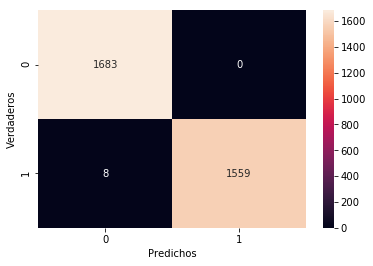

In [117]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
confusion_lr = confusion_matrix(y_test, y_pred_grid_lr)
print(confusion_lr)
confusion_knn = confusion_matrix(y_test, y_pred_grid_knn)
print(confusion_knn)
sns.heatmap(confusion_lr, annot=True, fmt='.0f')
plt.ylabel('Verdaderos')
plt.xlabel('Predichos');

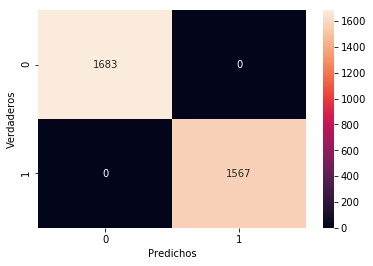

In [118]:
sns.heatmap(confusion_knn, annot=True, fmt='.0f')
plt.ylabel('Verdaderos')
plt.xlabel('Predichos');

In [119]:
y_pred_lr_proba = grid_lr.predict_proba(X_test_encoder)
y_pred_lr_proba_df = pd.DataFrame(y_pred_lr_proba)
y_pred_lr_proba_df

,0,1
0,0.992613,0.007387
1,0.027825,0.972175
2,0.997574,0.002426
3,0.982865,0.017135
4,0.998700,0.001300
...,...,...
3245,0.003274,0.996726
3246,0.980405,0.019595
3247,0.193750,0.806250
3248,0.997638,0.002362


### Test sobre los threshold

In [120]:
# Specificity
TP = confusion_lr[1, 1]
TN = confusion_lr[0, 0]
FP = confusion_lr[0, 1]
FN = confusion_lr[1, 0]

speci = TN/(TN+FP)
speci

1.0

### Curva ROC

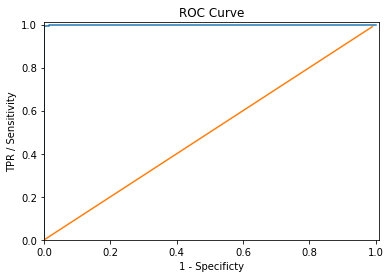

In [121]:
from sklearn.metrics import roc_curve
fpr_lr,tpr_lr,thr_lr = roc_curve(y_test, y_pred_lr_proba[:,1])

df = pd.DataFrame(dict(fpr=fpr_lr, tpr=tpr_lr, thr = thr_lr))

plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve')
plt.plot(df['fpr'],df['tpr'])
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show()

In [122]:
from sklearn.metrics import auc
print('AUC=', auc(fpr_lr, tpr_lr))

AUC= 0.9997106846838444


(0, 1)

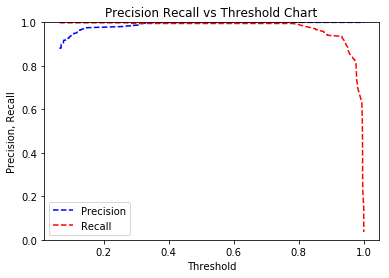

In [123]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_lr_proba[:,1])
   #retrieve probability of being 1(in second column of probs_y)
pr_auc = auc(recall, precision)
plt.title('Precision Recall vs Threshold Chart')
plt.plot(thresholds, precision[: -1], 'b--', label='Precision')
plt.plot(thresholds, recall[: -1], 'r--', label='Recall')
plt.ylabel('Precision, Recall')
plt.xlabel('Threshold')
plt.legend(loc='lower left')
plt.ylim([0,1])

In [127]:
best_lr= grid_lr.best_estimator_
best_lr

LogisticRegression(C=0.11222222222222222, penalty='l1', solver='saga')

### Revisar los coeficientes y estudiar la situación

In [143]:
coeficientes = pd.DataFrame(best_lr.coef_, columns=encoder.get_feature_names(input_features=X_train.columns)).T
pd.set_option('display.max_rows', None)
display(coeficientes.sort_values(by=0))

,0
odor_n,-3.734835
gill-spacing_w,-1.587840
odor_l,-1.101546
bruises_t,-0.840531
stalk-surface-above-ring_s,-0.812694
stalk-color-above-ring_w,-0.267414
stalk-root_c,-0.223365
spore-print-color_n,-0.214177
cap-color_y,-0.107375
ring-type_p,-0.103970


## Naive Bayes

In [144]:
from sklearn.naive_bayes import GaussianNB

In [146]:
gnb = GaussianNB()

gnb.fit(X_train_encoder.todense(), y_train)

GaussianNB()

In [150]:
y_pred_gnb = gnb.predict(X_test_encoder.todense())

y_pred_gnb

array([0, 1, 0, ..., 1, 0, 1])

In [164]:
from sklearn.metrics import accuracy_score
round(accuracy_score(y_test, y_pred_gnb), 2)

0.94

[[1496  187]
 [   1 1566]]


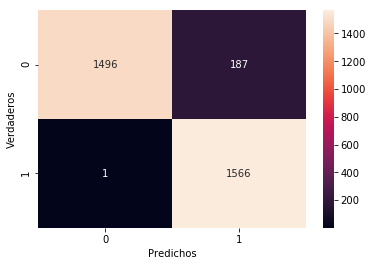

In [154]:
confusion_gnb = confusion_matrix(y_test, y_pred_gnb)
print(confusion_gnb)
sns.heatmap(confusion_gnb, annot=True, fmt='.0f')
plt.ylabel('Verdaderos')
plt.xlabel('Predichos');

## DesicionTreeClassifier

In [156]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz


In [157]:
dt = DecisionTreeClassifier()
dt = dt.fit(X_train_encoder, y_train)

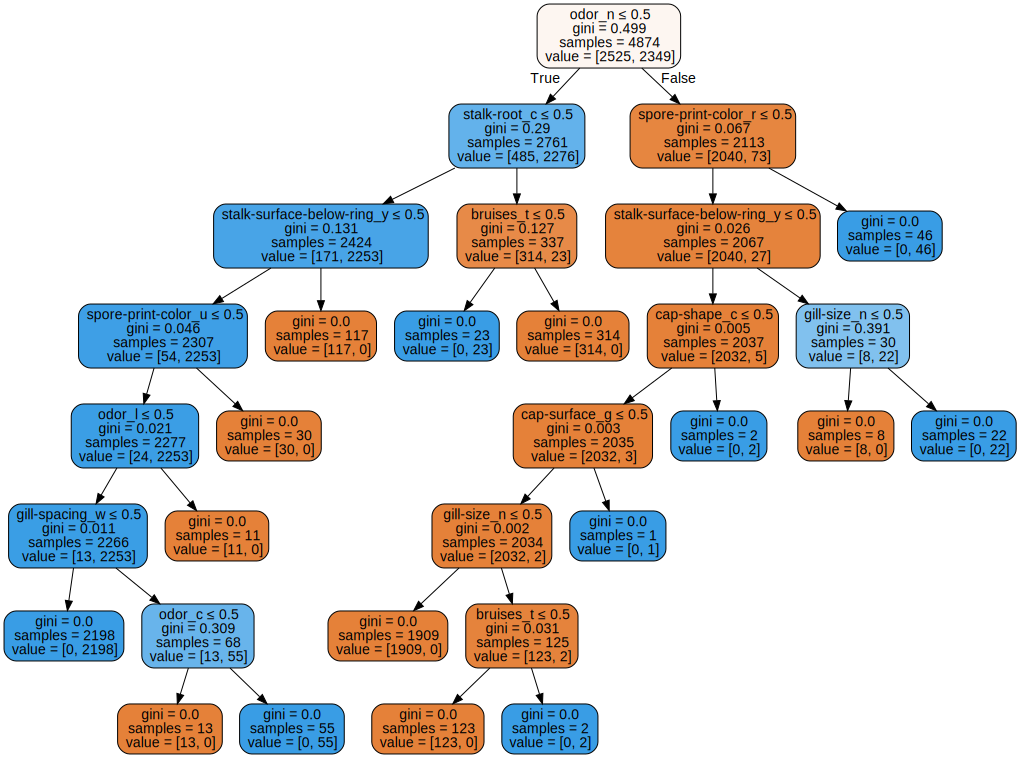

In [158]:
dot_data = export_graphviz(dt, out_file=None, 
                         feature_names=encoder.get_feature_names(input_features=X_train.columns),  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

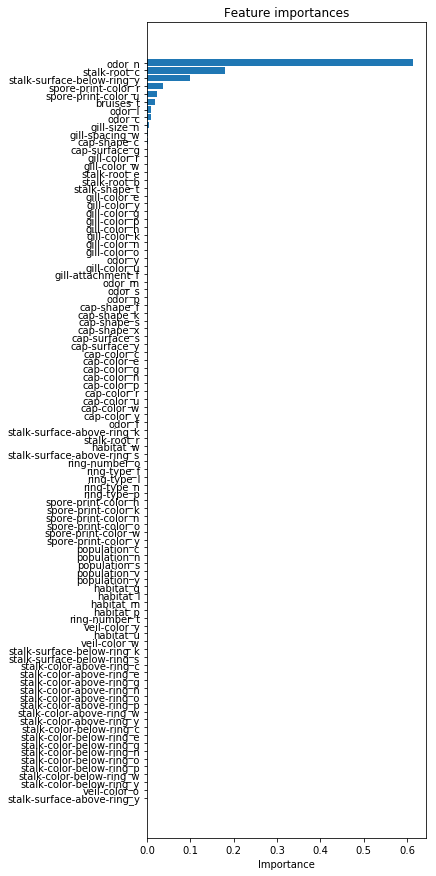

In [161]:
features_list = encoder.get_feature_names(input_features=X_train.columns)
feature_importance = dt.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(5,15))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importances')
plt.draw()
plt.show()

In [162]:
y_pred_dt = dt.predict(X_test_encoder)

y_pred_dt

array([0, 1, 0, ..., 1, 0, 1])

In [163]:

round(accuracy_score(y_test, y_pred_dt), 2)

1.0

[[1683    0]
 [   0 1567]]


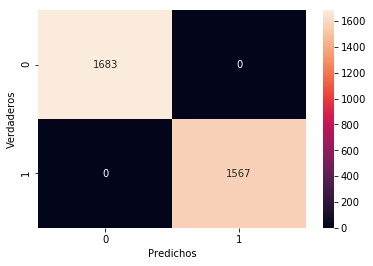

In [165]:
confusion_dt = confusion_matrix(y_test, y_pred_dt)
print(confusion_dt)
sns.heatmap(confusion_dt, annot=True, fmt='.0f')
plt.ylabel('Verdaderos')
plt.xlabel('Predichos');